<a href="https://colab.research.google.com/github/ManiDGM/RealMadridPerformanceAnalysis/blob/main/Real_Madrid_Season_2023_24_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Team.jpg](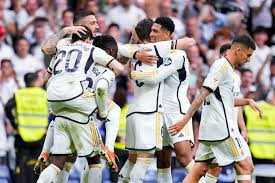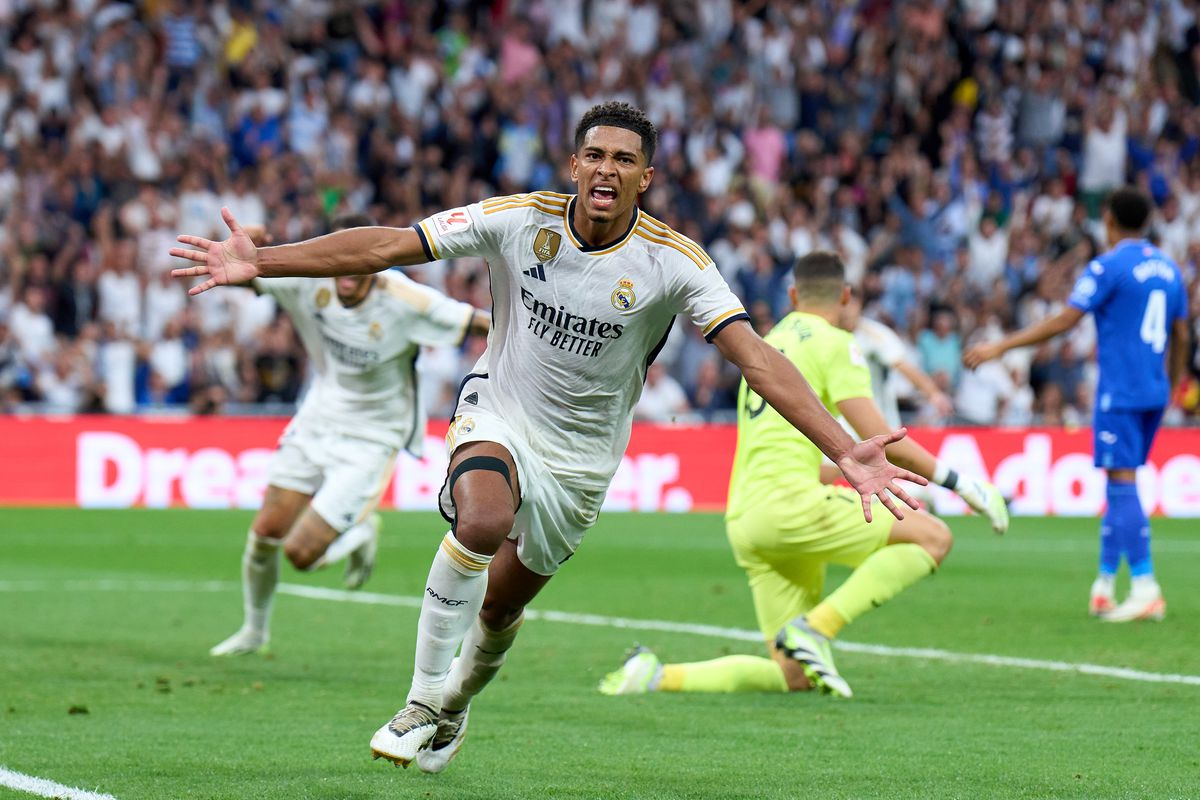)# EDA on Real Madrid Season 2023/24 La Liga Performance Analysis

---





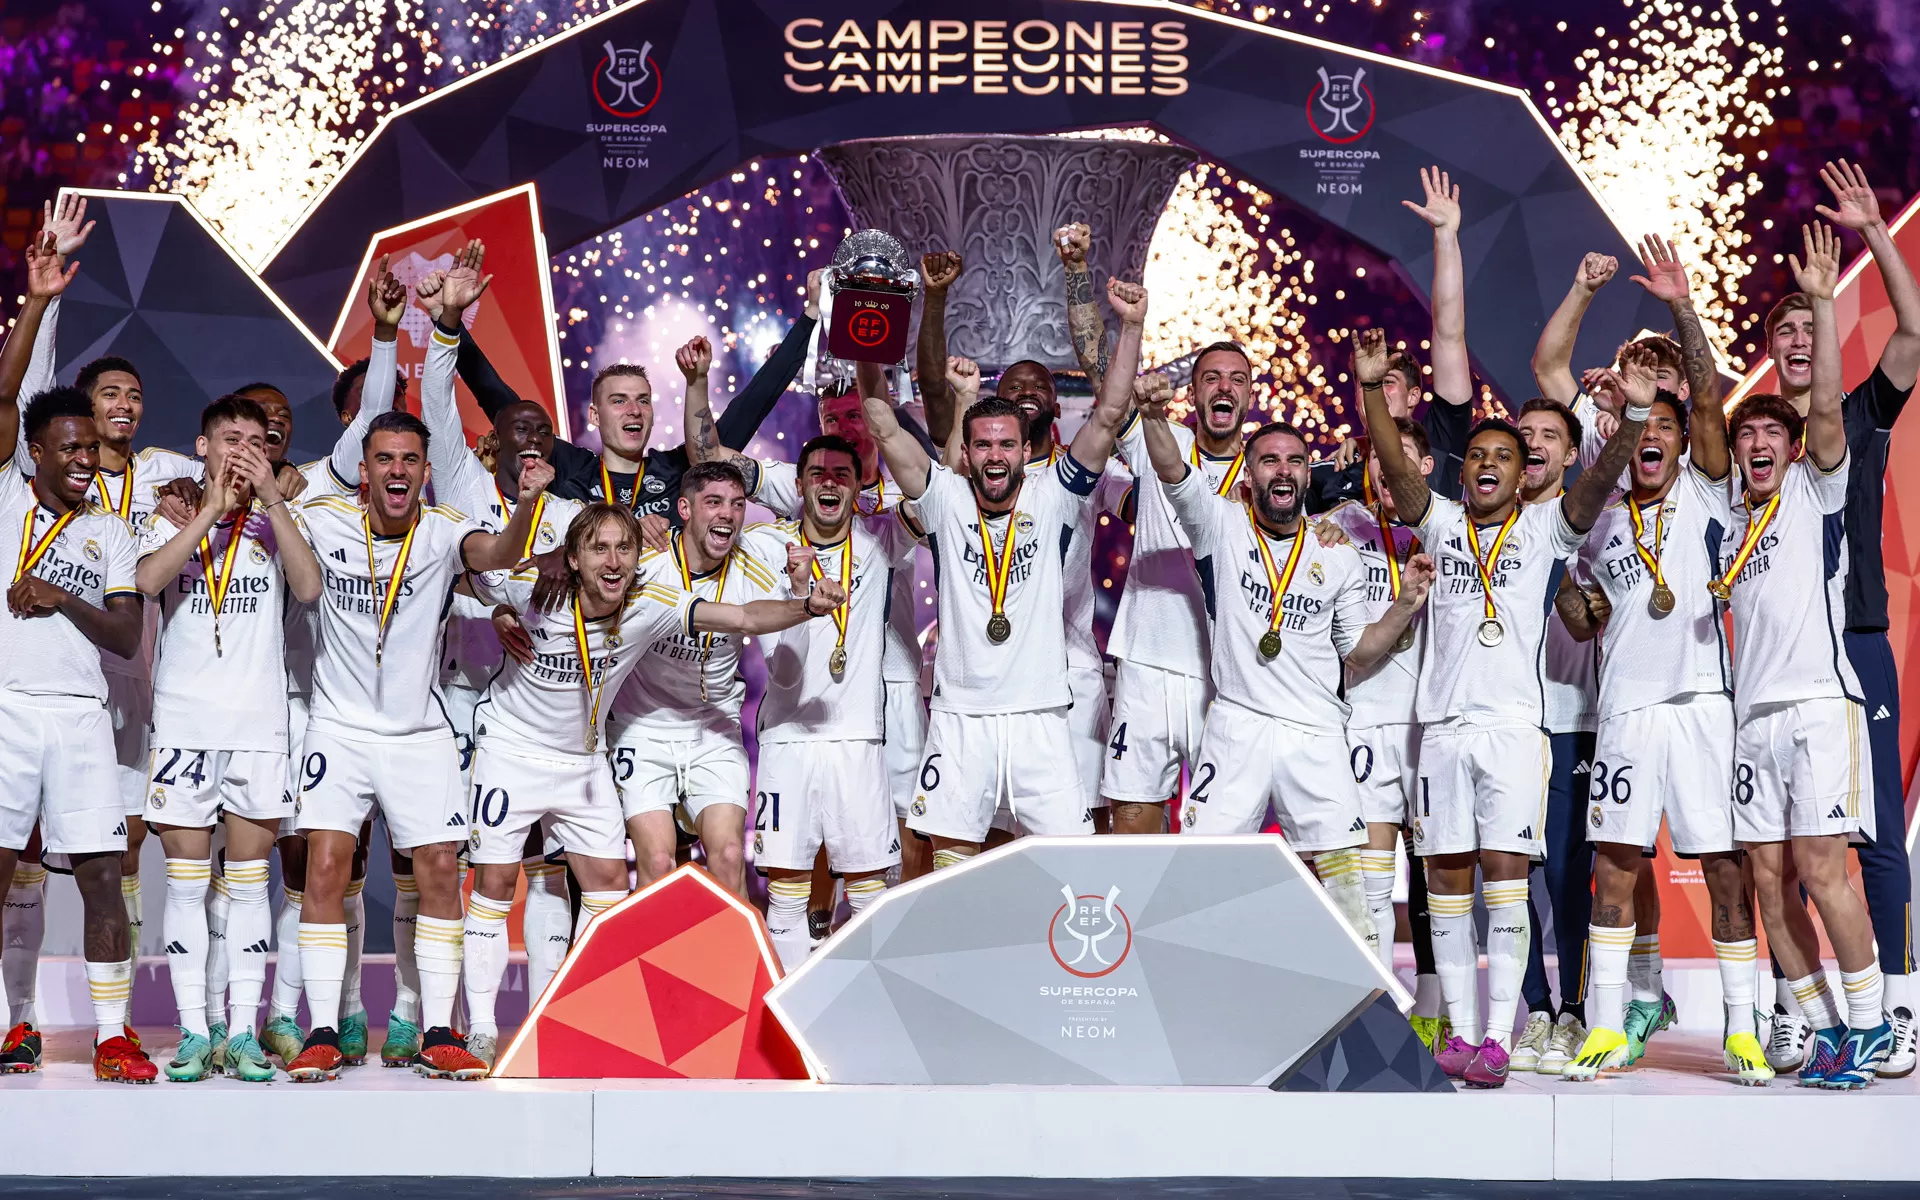

#Objectives:



*   Exploratory data analysis on Real Madrid season 2023/24 performance in La Liga
*   Apply data visualization techniques using plotly's data visualization library


---

# Table Of Contents


1.   [Introduction](#introduction)
*    [1.1 La Liga](#LaLiga)
*    [1.2 The Dataset](#dataset)
*    [1.3 Data Pre-Processing](#PreProcessing)

2.   [Team Performance Analysis](#TeamPerformance)
*    [2.1 Win Ratio](#WinRatio)
*    [2.2 Attacking Performance](#AttackingPerformance)
*    [2.3 Defensive Performance](#DefensivePerformance)

3.   [Player Performance Analysis](#PlayerPerformance)
*    [3.1 Goals Per Match](#Goals)
*    [3.2 Assists Per Match](#Assists)
*    [3.3 Goals Contributions (G+A)](#GoalsContributions)
*    [3.4 Passing Efficiency(Midfielders Only)](#PassingEfficiency)

4.   [Player And Team Performance Comparison](#Comparison)
*    [4.1 Goals Per Match](#GoalsPerMatch)
*    [4.2 Game By Game Analysis](#GameByGame)

---



# 1. Introduction <a name="introduction"></a>

## 1.1 La Liga<a name="LaLiga"></a>

The 2023/24 La Liga season was a highly anticipated campaign for Real Madrid, marked by significant expectations and key changes within the squad. With the appointment of a new manager and the acquisition of several high-profile players, the team aimed to reclaim the league title and showcase their dominance in Spanish football.

This analysis focuses on evaluating both the team's overall performance and the contributions of individual players. By examining various performance metrics, such as goals per match, assists per match, and passing efficiency, we aim to provide a comprehensive review of Real Madrid's season. Additionally, we compare the performance of a key player against the team's overall performance to assess the player's effectiveness and impact on the team's success.

## 1.2 The Dataset <a name="dataset"></a>

For this analysis, multiple CSV files were utilized to gather comprehensive data on Real Madrid's 2023/24 La Liga season. Each CSV file contained different sets of information, contributing to a detailed and multifaceted view of the team's and players' performances. The datasets included:

Match Results CSV: Contained data on match outcomes, including goals scored, goals conceded, and match dates.

Player Statistics CSV: Included individual player metrics such as goals per match, assists per match, and minutes played.

Team Performance CSV: Provided team-level statistics like possession, shots on target, and passing accuracy.

Additional Metrics CSV: Added specific metrics for midfielders' passing efficiency and overall team aggression ratio.

Data cleaning and preprocessing steps were applied to ensure consistency and accuracy across all datasets. This included handling missing values, correcting data entry errors, and merging datasets to create a unified analysis framework. New columns were added where necessary to facilitate detailed analysis and comparison.

By leveraging these diverse datasets, we aim to present a thorough examination of both team and player performances throughout the season.

## 1.3 Data Pre-Processing<a name="PreProcessing"></a>


### Importing Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Extracting Player Data:

In [3]:
df = pd.read_csv('/content/merged_player_data.csv')
# print(df)
#print(df.columns)

realmadrid_players = df[df['TEAM'] == "REAL MADRID"][['NAME', 'TEAM','GAMES', 'GOALS SCORED', 'GOALS PER MATCH', 'ASSISTS', 'ASSISTS PER MATCH', 'Completed Pass','Total Pass']]


new_df = realmadrid_players.to_csv('/content/RealMadrid_player_stats.csv', index=False)

### Adding New Columns:

In [4]:

df = pd.read_csv('/content/RealMadrid_player_stats.csv')
# print(df)

# adding new columns
df['Total Contributions (G+A)'] = df['GOALS SCORED'] + df['ASSISTS']
df['Passing Efficiency'] = (df['Completed Pass'] / df['Total Pass'])*100

# reordering columns
df = df[['NAME', 'TEAM', 'GAMES', 'GOALS SCORED', 'GOALS PER MATCH', 'ASSISTS',
       'ASSISTS PER MATCH', 'Total Contributions (G+A)', 'Completed Pass', 'Total Pass', 'Passing Efficiency']]
# print(df.columns)

df.to_csv('/content/RealMadrid_player_stats.csv', index=False)

### League Team Standings:



In [6]:
df = pd.read_csv('/content/laliga_team_standings.csv')
# print(df)
# print(df.columns)
# adding new columns
df['Win Ratio (%)'] = (df['WIN'] / df['PLAYED']) * 100
df['GOALS SCORED PER MATCH'] = df['GOAL SCORED'] / df['PLAYED']
df['GOALS CONCEEDED PER MATCH'] = df['GOAL ACCUMULATE'] / df['PLAYED']

# reordering columns
df = df[['Team POSITION', 'TEAM', 'POINTS', 'PLAYED', 'WIN', 'DRAW', 'LOOSE','Win Ratio (%)',
       'GOAL SCORED', 'GOAL ACCUMULATE', 'GOAL DIFFERENCE', 'GOALS SCORED PER MATCH', 'GOALS CONCEEDED PER MATCH']]

df.to_csv('/content/laliga_team_standings.csv', index=False)

### La Liga Team Performance:

In [7]:
df = pd.read_csv('/content/laliga_team_performance.csv')
# print(df)
# print(df.columns)

# adding new columns
df['Aggression Ratio'] = ((df['YEELLOW_CARDS'] + df['RED CARDS']) / df['FOULS']) * 100
df['Scoring Efficiency'] = (df['GOALS SCORED'] / df['SHOTS ON TRAGET']) * 100

# reordering columns

df = df[['TEAM', 'GOALS SCORED', 'GOALS CONCEDED',
       'SHOTS ON TRAGET','Scoring Efficiency', 'FOULS', 'YEELLOW_CARDS', 'RED CARDS',
       'Aggression Ratio']]

df.to_csv('/content/laliga_team_performance.csv', index=False)

### Real Madrid Results

In [8]:
df = pd.read_csv('/content/real_madrid_results.csv', index_col='Week')

print(df)
#print(df.columns)


              Opponent Home/Away Result
Week                                   
1        Athletic Club      Away      W
2              Almeria      Away      W
3           Celta Vigo      Away      W
4               Getafe      Home      W
5        Real Sociedad      Home      W
6      Atletico Madrid      Away      L
8               Girona      Away      W
9              Osasuna      Home      W
10             Sevilla      Away      D
11           Barcelona      Away      W
12      Rayo Vallecano      Home      D
13            Valencia      Home      W
14               Cadiz      Away      W
15             Granada      Home      W
16          Real Betis      Away      D
17          Villarreal      Home      W
18    Deportivo Alaves      Away      W
19            Mallorca      Home      W
20             Almeria      Home      W
21              Getafe      Away      W
22     Atletico Madrid      Home      D
23              Girona      Home      W
24            Valencia      Away      D


### Jude Bellingham results

In [10]:
df = pd.read_csv('/content/Bellingham.csv', index_col='week')

print(df)
# print(df.columns)

              opponent home/away result  G/A
week                                        
1        Athletic Club      Away      W    1
2              Almeria      Away      W    3
3           Celta Vigo      Away      W    1
4               Getafe      Home      W    1
5        Real Sociedad      Home      W    0
6      Atletico Madrid      Away      L    0
8               Girona      Away      W    2
9              Osasuna      Home      W    2
10             Sevilla      Away      D    0
11           Barcelona      Away      W    2
12      Rayo Vallecano      Home      D    0
13            Valencia      Home      W    0
14               Cadiz      Away      W    1
15             Granada      Home      W    0
16          Real Betis      Away      D    1
17          Villarreal      Home      W    1
18    Deportivo Alaves      Away      W    0
19            Mallorca      Home      W    0
20             Almeria      Home      W    2
21              Getafe      Away      W    0
22     Atl

# 2. Team Performance Analysis <a name="TeamPerformance"></a>

## 2.1 Win Ratio <a name="WinRatio"></a>


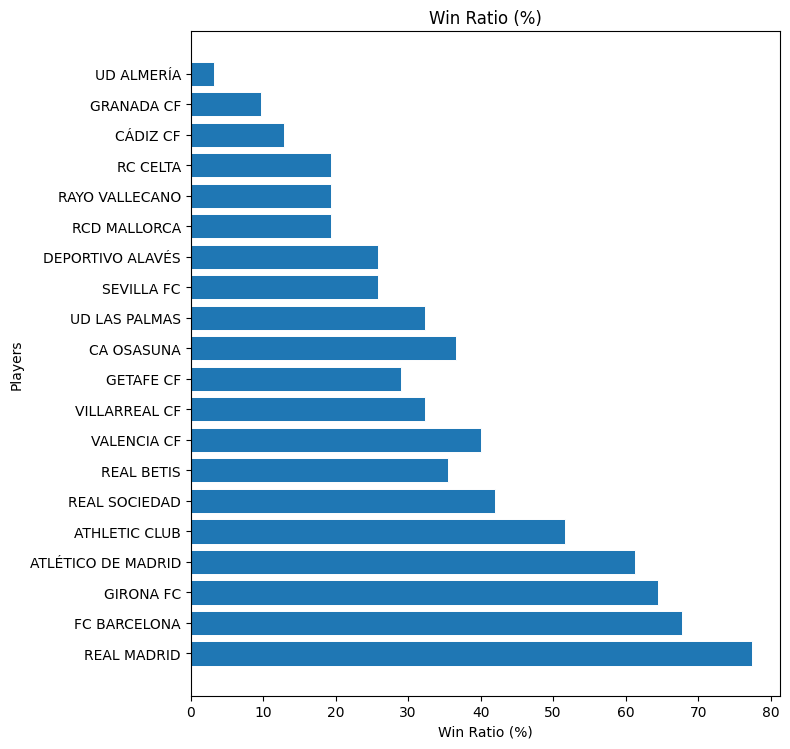

In [11]:
df = pd.read_csv('/content/laliga_team_standings.csv')


x = df['TEAM']
y = df['Win Ratio (%)']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Players')
ax.set_xlabel('Win Ratio (%)')
ax.set_title('Win Ratio (%)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:

Real Madrid demonstrated a strong performance throughout the season, achieving a win ratio of 77.41%. This high win percentage reflects the team's consistency and ability to secure victories in a competitive league.

## 2.2 Attacking Performance <a name="AttackingPerformance"></a>

### Goals Scored:

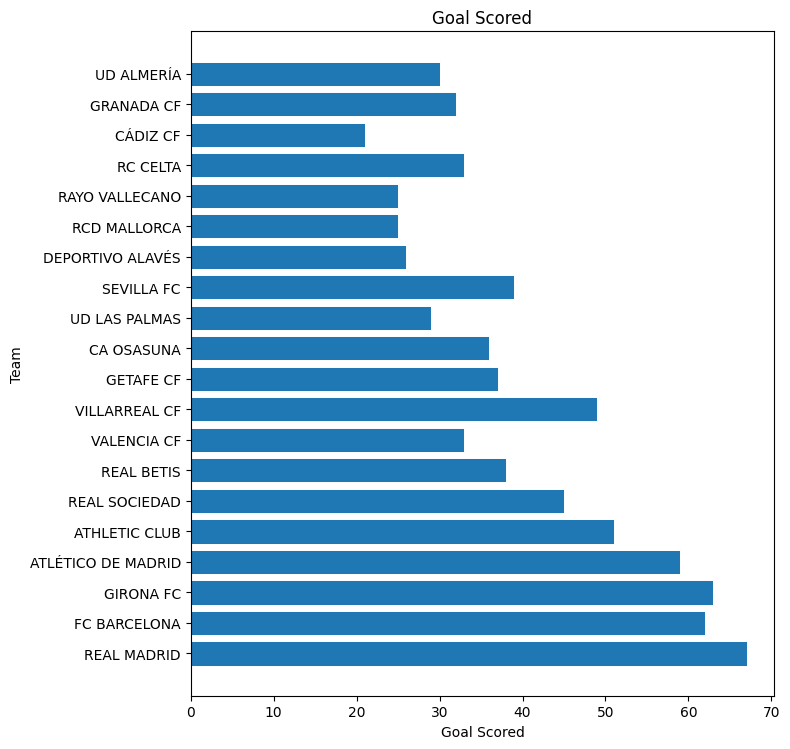

In [12]:
df = pd.read_csv('/content/laliga_team_standings.csv')


x = df['TEAM']
y = df['GOAL SCORED']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Team')
ax.set_xlabel('Goal Scored')
ax.set_title('Goal Scored')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:

The team scored a total of 67 goals, showcasing their offensive strength. Key matches with high goal counts further highlighted the team's attacking prowess and ability to dominate opponents.

### Goals Scored Per Match:

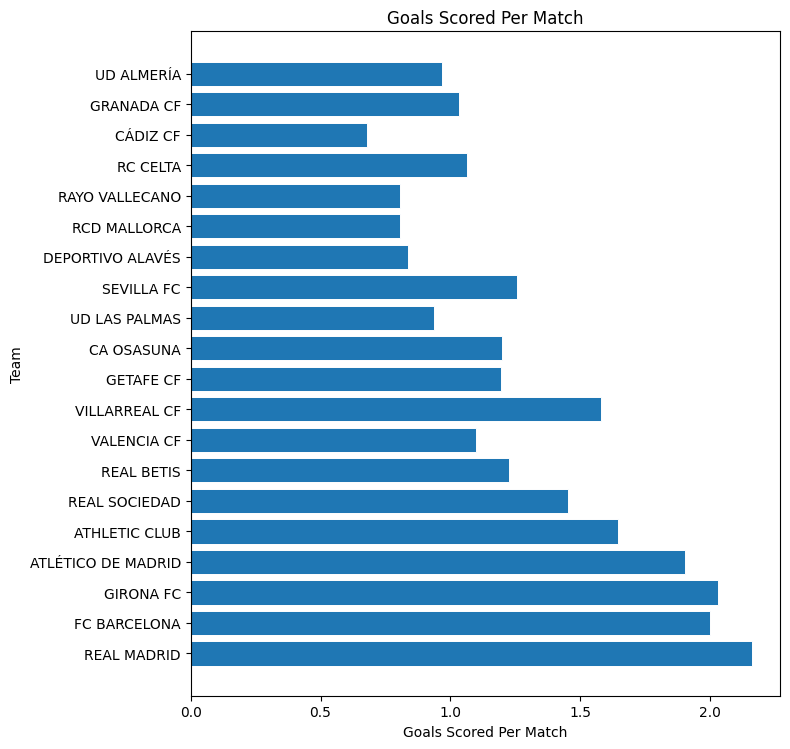

In [13]:
df = pd.read_csv('/content/laliga_team_standings.csv')


x = df['TEAM']
y = df['GOALS SCORED PER MATCH']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Team')
ax.set_xlabel('Goals Scored Per Match')
ax.set_title('Goals Scored Per Match')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:

On average, Real Madrid scored 2.16 goals per match. This consistent scoring rate was crucial in maintaining their competitive edge and securing points throughout the season.

### Scoring Efficiency:

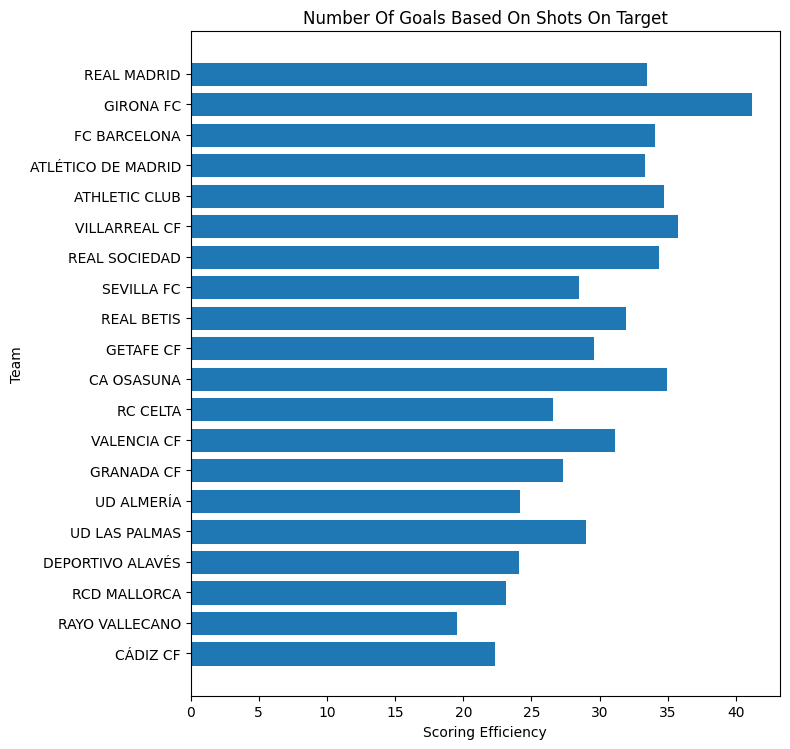

In [14]:
df = pd.read_csv('/content/laliga_team_performance.csv')


x = df['TEAM']
y = df['Scoring Efficiency']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Team')
ax.set_xlabel('Scoring Efficiency')
ax.set_title('Number Of Goals Based On Shots On Target')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:

The team's conversion rate of shots on target was 35.5%. This efficiency in turning scoring opportunities into goals underscores the team's offensive effectiveness and clinical finishing skills.

 However, it's noteworthy that Girona had an even better conversion rate with 41%, indicating superior finishing accuracy compared to Real Madrid.

### Goal Difference:

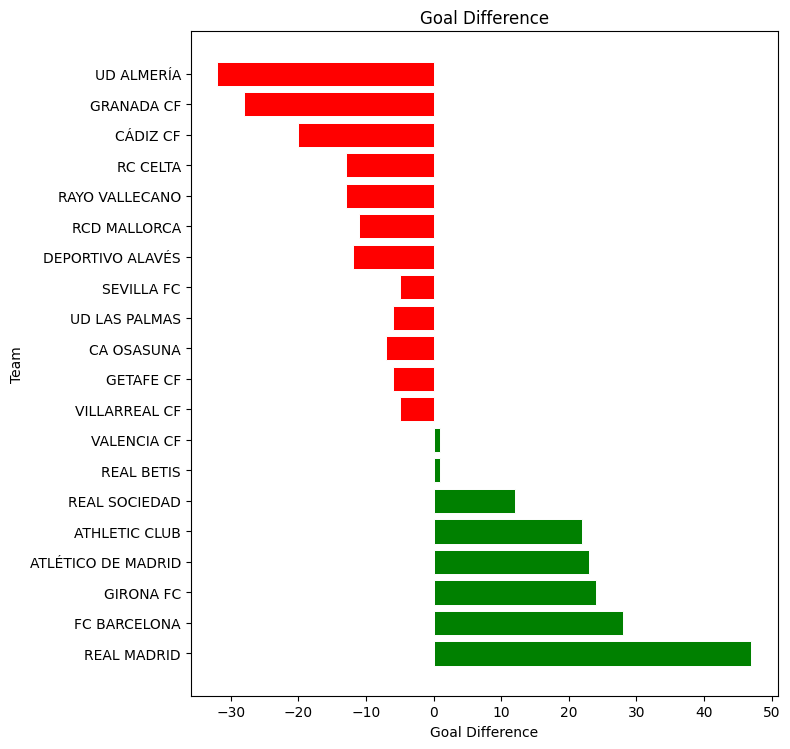

In [15]:
df = pd.read_csv('/content/laliga_team_standings.csv')

x = df['TEAM']
y = df['GOAL DIFFERENCE']

# Separate positive and negative goal differences
positive_goal_diff = [diff if diff > 0 else 0 for diff in y]
negative_goal_diff = [diff if diff < 0 else 0 for diff in y]

fig, ax = plt.subplots(figsize=(8, 8))

ax.barh(x, positive_goal_diff, color='green', edgecolor="white", linewidth=0.7)

ax.barh(x, negative_goal_diff, color='red', edgecolor="white", linewidth=0.7)

ax.set_ylabel('Team')
ax.set_xlabel('Goal Difference')
ax.set_title('Goal Difference')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


conclusion:

With a goal difference of 47, Real Madrid displayed a balanced approach, excelling in both attack and defense. This positive goal difference was a key factor in their successful league campaign.

## 2.3 Defensive Performance <a name="DefensivePerformance"></a>

### Goals Conceeded Analysis:

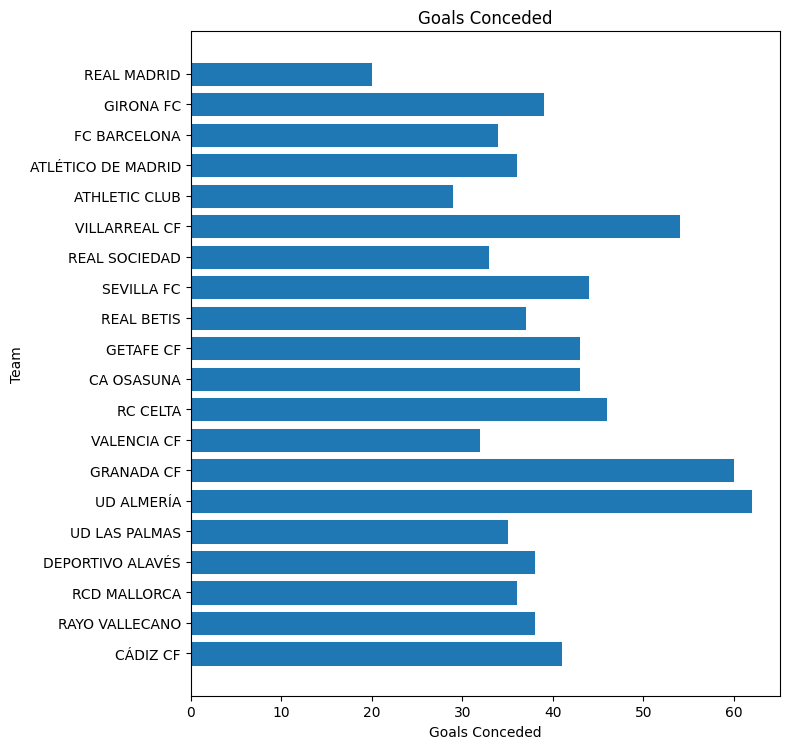

In [16]:
df = pd.read_csv('/content/laliga_team_performance.csv')


x = df['TEAM']
y = df['GOALS CONCEDED']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Team')
ax.set_xlabel('Goals Conceded')
ax.set_title('Goals Conceded')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:

Defensively, Real Madrid conceded a total of 20 goals. This measure reflects the team's defensive stability and ability to limit opponents' scoring opportunities.

### Goals Conceeded Per Match:

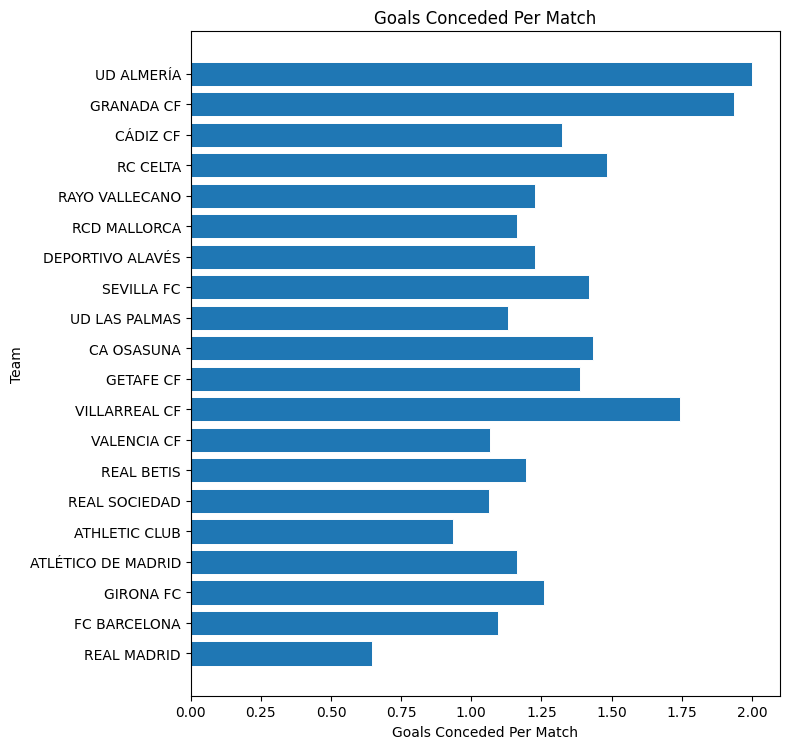

In [17]:
df = pd.read_csv('/content/laliga_team_standings.csv')


x = df['TEAM']
y = df['GOALS CONCEEDED PER MATCH']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Team')
ax.set_xlabel('Goals Conceded Per Match')
ax.set_title('Goals Conceded Per Match')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:

On average, the team conceded 0.64 goals per match. This metric highlights the effectiveness of their defensive strategies and the contributions of key defensive players.

### Aggression Ratio:

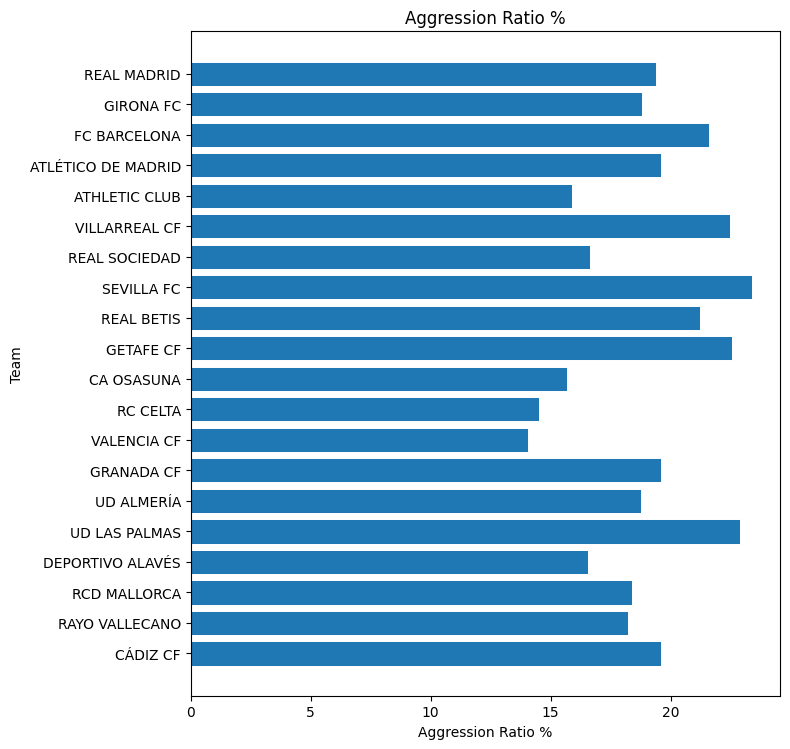

In [18]:
df = pd.read_csv('/content/laliga_team_performance.csv')


x = df['TEAM']
y = df['Aggression Ratio']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Team')
ax.set_xlabel('Aggression Ratio %')
ax.set_title('Aggression Ratio %')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:

The team's aggression ratio, measured by fouls and tackles per match, was 19.4%. This level of aggression played a role in their defensive strategy, disrupting opponents' play while maintaining discipline.

# 3. Player Performance Analysis <a name="PlayerPerformance"></a>

## 3.1 Goals Per Match <a name="Goals"></a>

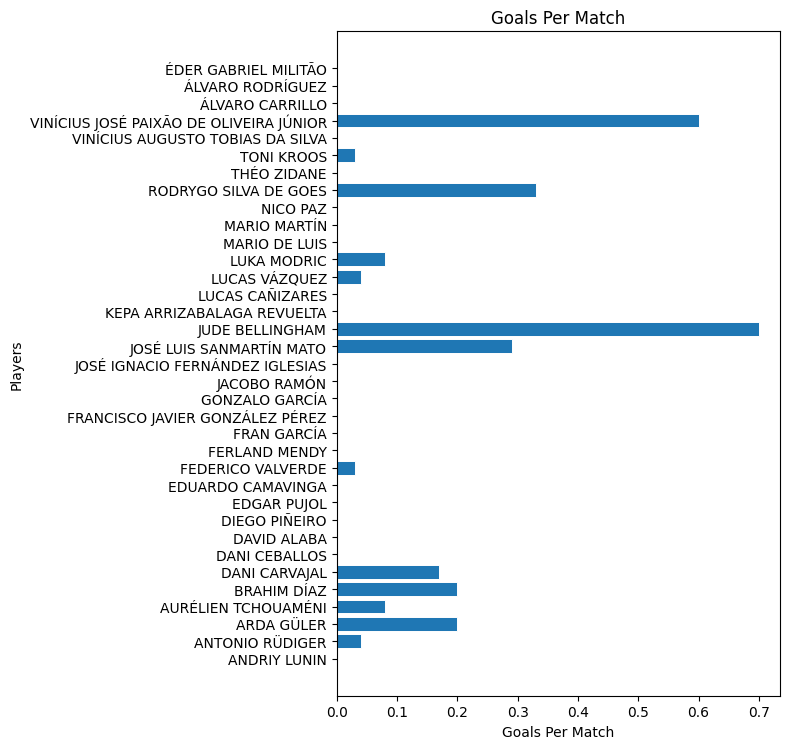

In [19]:
df = pd.read_csv('/content/RealMadrid_player_stats.csv')

x = df['NAME']
y = df['GOALS PER MATCH']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Players')
ax.set_xlabel('Goals Per Match')
ax.set_title('Goals Per Match')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



conclusion:

Jude Bellingham consistently demonstrated his goal-scoring prowess, averaging 0.7 goals per match. This metric highlights his critical role in the team's offensive strategy, providing a reliable source of goals throughout the season.

## 3.2 Assists Per Match<a name="Assists"></a>

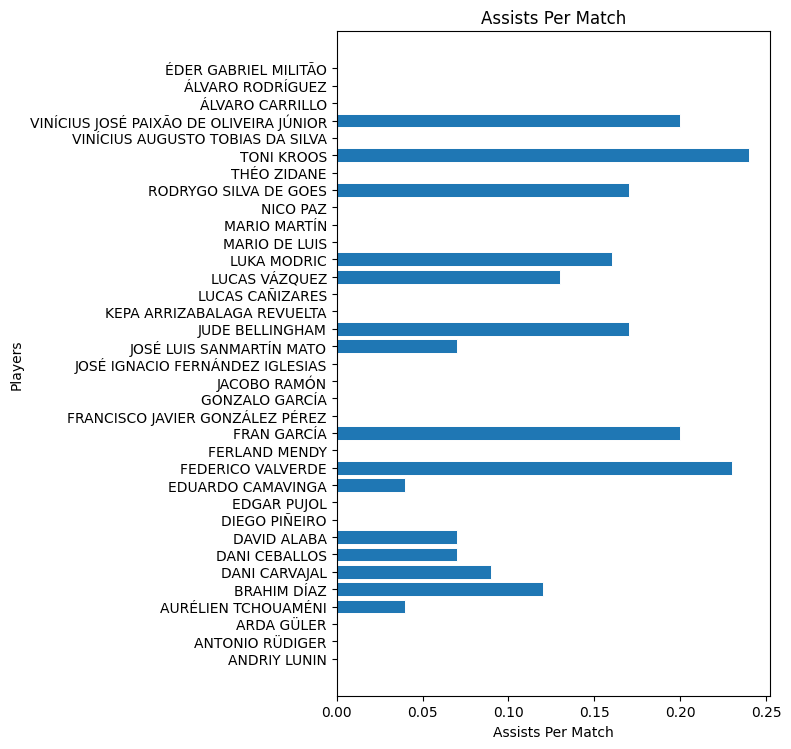

In [20]:
df = pd.read_csv('/content/RealMadrid_player_stats.csv')

x = df['NAME']
y = df['ASSISTS PER MATCH']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Players')
ax.set_xlabel('Assists Per Match')
ax.set_title('Assists Per Match')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:

While Jude Bellingham excelled in scoring goals, another standout performer in terms of assists was Toni Kross. Averaging 0.25 assists per match, Toni Kross proved to be a pivotal playmaker, contributing significantly to the team's overall attacking play.

## 3.3 Goals Contributions (G+A) <a name="GoalsContributions"></a>

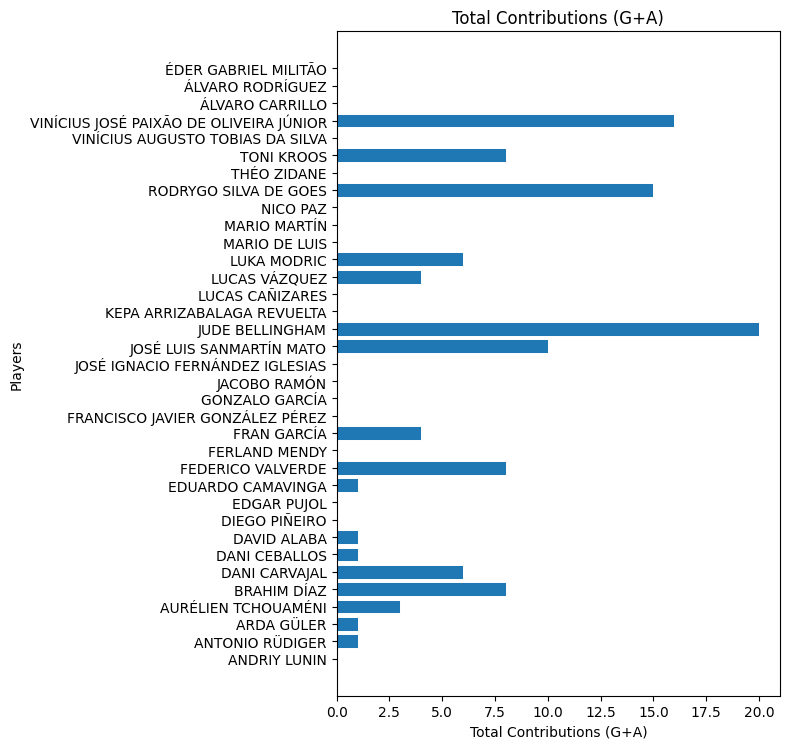

In [21]:
df = pd.read_csv('/content/RealMadrid_player_stats.csv')

x = df['NAME']
y = df['Total Contributions (G+A)']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Players')
ax.set_xlabel('Total Contributions (G+A)')
ax.set_title('Total Contributions (G+A)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:

Combining goals and assists, Jude Bellingham had a total of 20 G+A. This comprehensive measure of offensive contribution underscores his importance in both scoring and setting up goals, making him one of the standout performers for Real Madrid.

## 3.4 Passing Efficiency(Midfielders Only) <a name="PassingEfficiency"></a>

analysis for midfielders with more than 20 games played

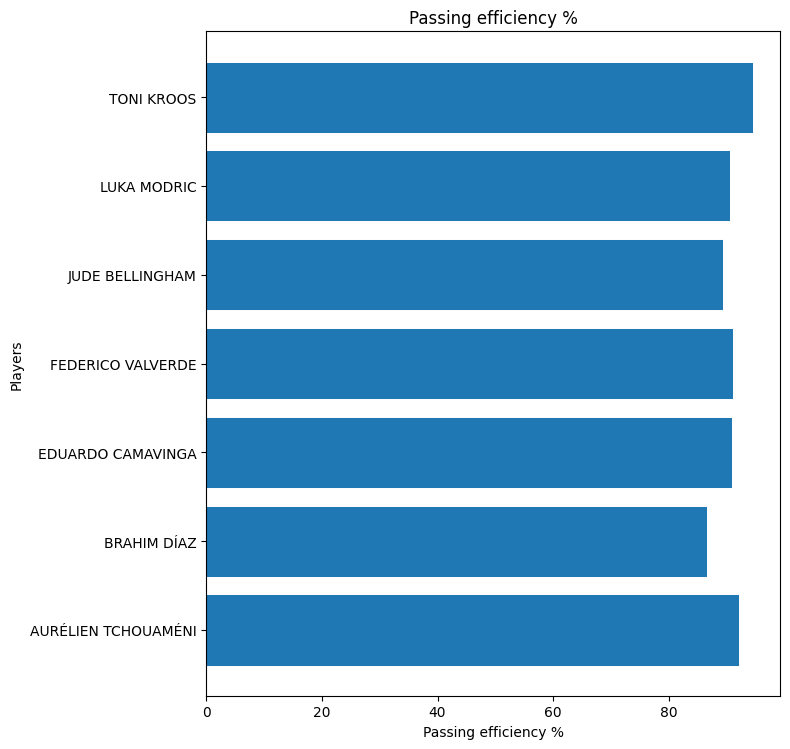

In [22]:
df = pd.read_csv('/content/RealMadrid_player_stats.csv')


players_to_plot = ['EDUARDO CAMAVINGA', 'AURÉLIEN TCHOUAMÉNI', 'BRAHIM DÍAZ', 'FEDERICO VALVERDE', 'JUDE BELLINGHAM', 'LUKA MODRIC', 'TONI KROOS']
filtered_df = df[df['NAME'].isin(players_to_plot)]


x = filtered_df['NAME']
y = filtered_df['Passing Efficiency']

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, edgecolor="white", linewidth=0.7)
ax.set_ylabel('Players')
ax.set_xlabel('Passing efficiency %')
ax.set_title('Passing efficiency %')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:

Among the midfielders, Toni Kross showcased exceptional passing efficiency, with an accuracy rate of 94%. His ability to maintain possession and distribute the ball effectively was crucial in controlling the midfield and initiating attacks.

#4. Player And Team Performance Comparison<a name="Comparison"></a>

##4.1 Goals Per Match<a name="GoalsPerMatch"></a>

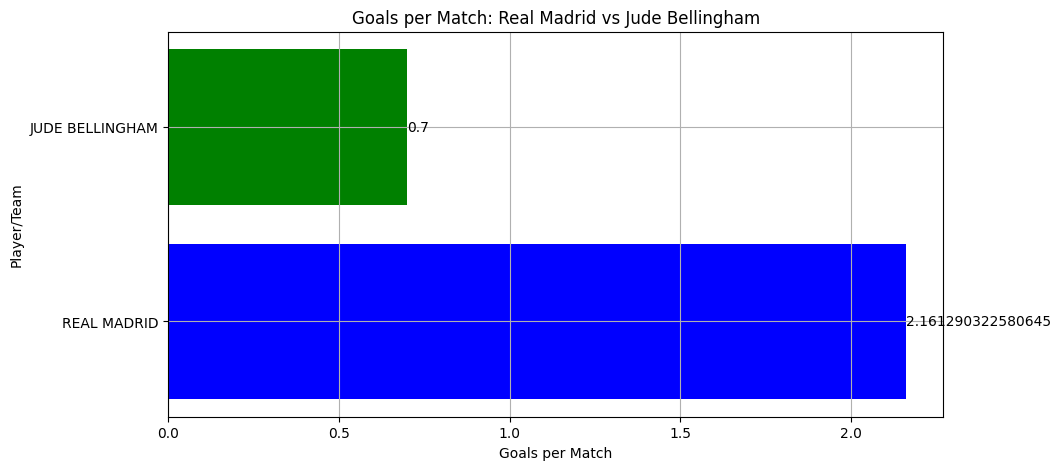

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df_team = pd.read_csv('/content/laliga_team_standings.csv')
df_player = pd.read_csv('/content/RealMadrid_player_stats.csv')


# Extract the "Goals per match" data for team
team_name = 'REAL MADRID'
goals_per_match_team = df_team[df_team['TEAM'] == team_name]['GOALS SCORED PER MATCH'].values[0]

# Extract the "Goals per match" data for player
player_name = 'JUDE BELLINGHAM'
goals_per_match_player = df_player[df_player['NAME'] == player_name]['GOALS PER MATCH'].values[0]

# Plot the data
entities = [team_name, player_name]
values = [goals_per_match_team, goals_per_match_player]

plt.figure(figsize=(10, 5))

# Plot the goals per match
plt.barh(entities, values, color=['blue', 'green'])

# Customize the plot
plt.title('Goals per Match: Real Madrid vs Jude Bellingham')
plt.xlabel('Goals per Match')
plt.ylabel('Player/Team')
plt.grid(True)

# Annotate the bars with the values
for index, value in enumerate(values):
    plt.text(value, index, f'{value}', va='center')

plt.show()



## 4.2 Game By Game Analysis <a name="GameByGame"></a>

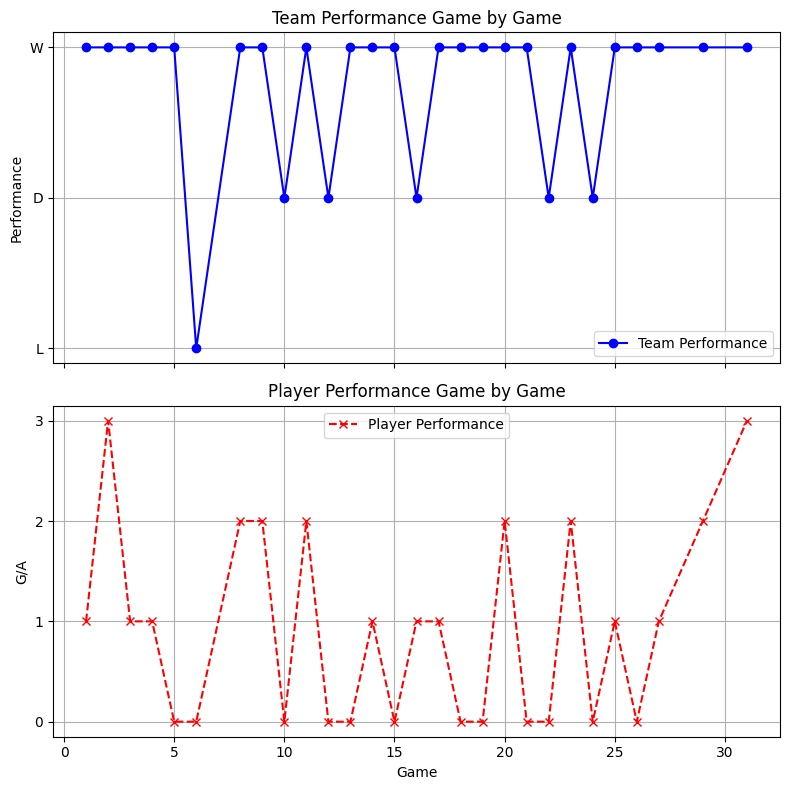

In [24]:
player = pd.read_csv("/content/Bellingham.csv")
team = pd.read_csv("/content/real_madrid_results.csv")


# Map team performance to numerical values
performance_mapping = {'W': 2, 'D': 1, 'L': 0}
team['TeamPerformanceNumeric'] = team['Result'].map(performance_mapping)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Team Performance
axes[0].plot(team['Week'], team['TeamPerformanceNumeric'], marker='o', linestyle='-', color='blue', label='Team Performance')
axes[0].set_ylabel('Performance')
axes[0].set_title('Team Performance Game by Game')
axes[0].set_yticks([0, 1, 2])
axes[0].set_yticklabels(['L', 'D', 'W'])
axes[0].legend()
axes[0].grid(True)

# Player Performance
axes[1].plot(player['week'], player['G/A'], marker='x', linestyle='--', color='red', label='Player Performance')
axes[1].set_xlabel('Game')
axes[1].set_ylabel('G/A')
axes[1].set_title('Player Performance Game by Game')
axes[1].set_yticks(range(0, max(player['G/A']) + 1))
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


conclusion:

The game-by-game comparison indicates that Jude B played a vital role in Real Madrid's 2023/24 La Liga campaign. Jude B's contributions in terms of goals and assists were often linked to the team's successful outcomes, highlighting their effectiveness and importance within the team. This analysis underscores the player's impact on the team's performance and the integral role they played in achieving the team's objectives.